In [105]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
import numpy as np

In [106]:
df_encoded=pd.read_csv("updated_player_data.csv")
df_encoded.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Club', 'Wage', 'PreferredFoot',
       'InternationalReputation', 'WeakFoot', 'SkillMoves', 'WorkRate',
       'BodyType', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Attacking', 'Skill',
       'Movement', 'Power', 'Mentality', 'Defending', 'Goalkeeping',
       'AllStats', 'AttackingWorkRate', 'DefensiveWorkRate', 'Position_CAM',
       'Position_CB', 'Position_CDM', 'Position_CF', 'Position_CM',
       'Position_GK', 'Position_LAM', 'Position_LB', 'Position_LCB'

In [107]:
X=df_encoded[['Age', 'PreferredFoot',
       'InternationalReputation', 'WeakFoot', 'SkillMoves', 
       'BodyType', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'AttackingWorkRate', 'DefensiveWorkRate', 'Position_CAM',
       'Position_CB', 'Position_CDM', 'Position_CF', 'Position_CM',
       'Position_GK', 'Position_LAM', 'Position_LB', 'Position_LCB',
       'Position_LCM', 'Position_LDM', 'Position_LF', 'Position_LM',
       'Position_LS', 'Position_LW', 'Position_LWB', 'Position_RAM',
       'Position_RB', 'Position_RCB', 'Position_RCM', 'Position_RDM',
       'Position_RF', 'Position_RM', 'Position_RS', 'Position_RW',
       'Position_RWB', 'Position_ST']]
y=df_encoded['Wage']
# X=df_encoded[['Age','Height', 'Weight', 'Attacking', 'Skill','Movement', 'Power', 'Mentality', 'Defending', 'Goalkeeping',
#        'Position_CAM', 'Position_CB', 'Position_CDM', 'Position_CF', 'Position_CM',
#        'Position_GK', 'Position_LAM', 'Position_LB', 'Position_LCB',
#        'Position_LCM', 'Position_LDM', 'Position_LF', 'Position_LM',
#        'Position_LS', 'Position_LW', 'Position_LWB', 'Position_RAM',
#        'Position_RB', 'Position_RCB', 'Position_RCM', 'Position_RDM',
#        'Position_RF', 'Position_RM', 'Position_RS', 'Position_RW',
#        'Position_RWB', 'Position_ST'
#        ]]

In [ ]:
# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add the input layers
nn_model.add(tf.keras.layers.Dense(units=128, activation="relu", input_dim=X_train_scaled.shape[1]))

# Additional hidden layers
nn_model.add(tf.keras.layers.Dense(units=64, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=32, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))

# Add the output layer (no activation for regression)
nn_model.add(tf.keras.layers.Dense(units=1))  

# Compile the model with Mean Squared Error for regression
optimizer = Adam(learning_rate=0.01)  
nn_model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["mae"])

c:\Users\mkori\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [109]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 128)            │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,097 (78.50 KB)

 Trainable params: 20,097 (78.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Scale the target variable y_train and y_test
y_scaler = StandardScaler()

# Convert y_train and y_test to numpy arrays and reshape them
y_train_scaled = y_scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))  
y_test_scaled = y_scaler.transform(y_test.to_numpy().reshape(-1, 1))  

# Fit the model to the training data 
fit_model = nn_model.fit(X_train_scaled, y_train_scaled, epochs=10, batch_size=32)

Epoch 1/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 0.7122 - mae: 0.3931
Epoch 2/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.5716 - mae: 0.3396
Epoch 3/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.9147 - mae: 0.4423
Epoch 4/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.3996 - mae: 0.3058
Epoch 5/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.4852 - mae: 0.3211
Epoch 6/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.4557 - mae: 0.3295
Epoch 7/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.7748 - mae: 0.4162
Epoch 8/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.4710 - mae: 0.3172
Epoch 9/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.4311 - mae: 0.2962
Epoch 10/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3814 - mae: 0.2783


In [111]:
# Evaluate the model using the test data
model_loss, model_mae = nn_model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
print(f"Loss: {model_loss}, Mean Absolute Error: {model_mae}")

140/140 - 2s - 16ms/step - loss: 0.4398 - mae: 0.2801
Loss: 0.4398140013217926, Mean Absolute Error: 0.2801024615764618


In [112]:
print("Mean of scaled X_train:", X_train_scaled.mean(axis=0))
print("Std of scaled X_train:", X_train_scaled.std(axis=0))

Mean of scaled X_train: [-3.66428126e-16 -7.66696656e-18 -7.66696656e-17  1.77397744e-16
 -2.49572981e-16  1.00199322e-16 -7.29683714e-17  4.58960481e-16
 -6.87383209e-17  1.53868088e-16  1.34304104e-16  5.92207073e-17
 -1.14211364e-16 -1.37476642e-16  2.85528410e-17 -5.49906567e-17
 -1.96697349e-16  2.96103536e-17 -3.67485639e-16 -3.70393798e-16
  9.70267838e-17 -2.74953284e-16  1.29545297e-16  8.46010104e-18
 -2.53406464e-16  6.76808083e-17 -4.91743373e-16  1.76075853e-16
 -4.23005052e-18  4.23005052e-18  1.29545297e-16  6.13357325e-17
 -3.17253789e-18 -1.45936743e-16 -8.14284725e-17  1.27959028e-16
  1.25315247e-16  1.05751263e-18  1.58626894e-18 -4.23005052e-17
 -3.91279673e-17 -7.82559346e-17 -7.93134472e-17  1.74489584e-16
  2.16790089e-17  5.20824970e-17 -9.30611114e-17 -1.08395045e-17
  9.78199182e-17 -2.11502526e-17  4.23005052e-18 -1.18970171e-17
 -3.09322444e-17 -3.17253789e-18 -1.05751263e-17  2.06214963e-17
 -1.90352273e-17 -7.00602117e-17  5.15537407e-17  2.24721434e-18
 

In [113]:
print(f"y_train range: {np.min(y_train)}, {np.max(y_train)}")
print(f"y_test range: {np.min(y_test)}, {np.max(y_test)}")

y_train range: 1000.0, 565000.0
y_test range: 1000.0, 355000.0


In [114]:
# Check the mean and standard deviation for the target
print("Mean of y_train after scaling:", y_train_scaled.mean())
print("Standard deviation of y_train after scaling:", y_train_scaled.std())

Mean of y_train after scaling: -2.009273996047314e-17
Standard deviation of y_train after scaling: 1.0


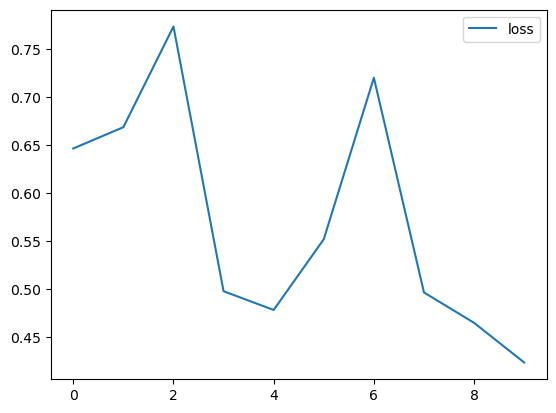

In [ ]:
# Optionally plot the loss
history_df = pd.DataFrame(fit_model.history)
history_df.plot(y="loss")
plt.show()